Part 3

In [2]:
import os
import zipfile

# I'm setting up the paths for the zip file and the extraction directory.
z_path="cnn_dataset.zip"
ext_dir="cnn_dataset"

# Opening the zip file to extract all its contents.
with zipfile.ZipFile(z_path,'r') as z_ref:
    z_ref.extractall(ext_dir)  # Here, I'm extracting the files.

# Now, I'll check what's inside the extracted directory.
contents=os.listdir(ext_dir)
contents  # This will show the contents.


['cnn_dataset']

In [9]:
import os

# Choosing a concise variable name for the dataset's main directory.
ext_dir="cnn_dataset"

# Looking into the 'cnn_dataset' subdirectory.
sd_path=os.path.join(ext_dir, 'cnn_dataset')
sd_contents=os.listdir(sd_path)

# I'll display the contents here to see what we've got.
sd_contents

['M',
 'O',
 'C',
 'T',
 '6',
 'N',
 'R',
 'F',
 '5',
 'K',
 'A',
 'Y',
 '1',
 'S',
 'B',
 'G',
 '0',
 '4',
 'J',
 'Z',
 'E',
 '8',
 '9',
 'V',
 'I',
 'P',
 'L',
 'W',
 '2',
 '7',
 'D',
 'X',
 'U',
 'Q',
 '3',
 'H']

{'M': 2800,
 'O': 2800,
 'C': 2800,
 'T': 2800,
 '6': 2800,
 'N': 2800,
 'R': 2800,
 'F': 2800,
 '5': 2800,
 'K': 2800,
 'A': 2800,
 'Y': 2800,
 '1': 2800,
 'S': 2800,
 'B': 2800,
 'G': 2800,
 '0': 2800,
 '4': 2800,
 'J': 2800,
 'Z': 2800,
 'E': 2800,
 '8': 2800,
 '9': 2800,
 'V': 2800,
 'I': 2800,
 'P': 2800,
 'L': 2800,
 'W': 2800,
 '2': 2800,
 '7': 2800,
 'D': 2800,
 'X': 2800,
 'U': 2800,
 'Q': 2800,
 '3': 2800,
 'H': 2800}

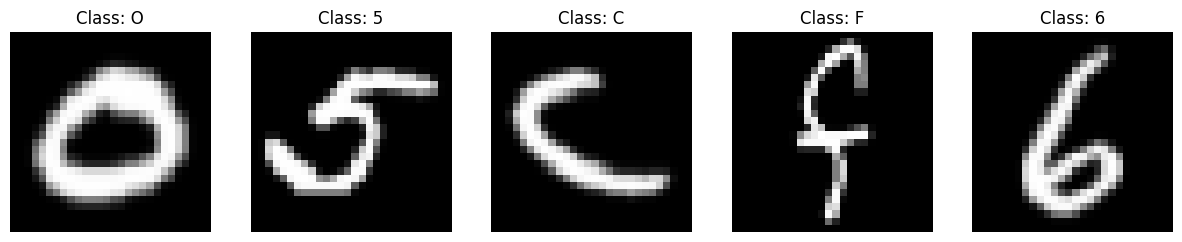

In [30]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

# I'm initializing lists for the images I will sample and their labels.
imgs=[]
lbls=[]
# I'll pick 5 random categories from the contents of the subdirectory.
for cat in random.sample(sd_contents,5):
    cat_path=os.path.join(sd_path,cat)  # The path to the images in the category.
    img_path=random.choice(os.listdir(cat_path))  # I'll select a random image.
    img=Image.open(os.path.join(cat_path,img_path))  # Opening the image.

    imgs.append(img)  # Adding the image to my list.
    lbls.append(cat)  # And the category label as well.

# Now it's time to plot these images.
fig,axs=plt.subplots(1,5,figsize=(15,3))  # Creating a row of 5 subplots.
for ax,i,l in zip(axs, imgs, lbls):
    ax.imshow(i, cmap='gray')  # I'll display each image in grayscale.
    ax.set_title('Class: {}'.format(l))  # And set the title to the class label.
    ax.axis('off')  # I don't need any axes, so I turn them off.

# I'm curious about how many images there are in each category.
img_count={c:len(os.listdir(os.path.join(sd_path,c))) for c in sd_contents}
img_count # This will give me a dictionary with the counts.

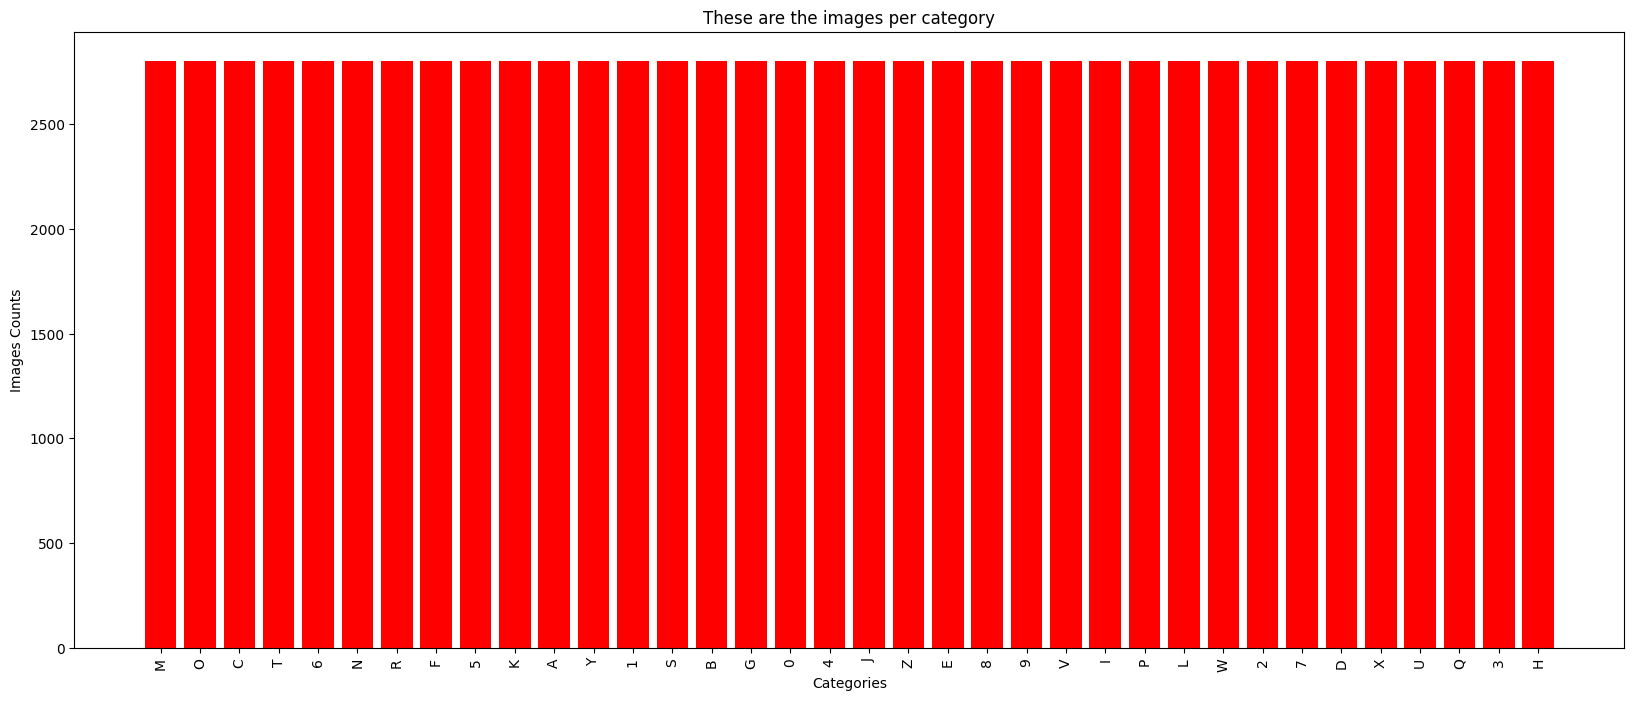

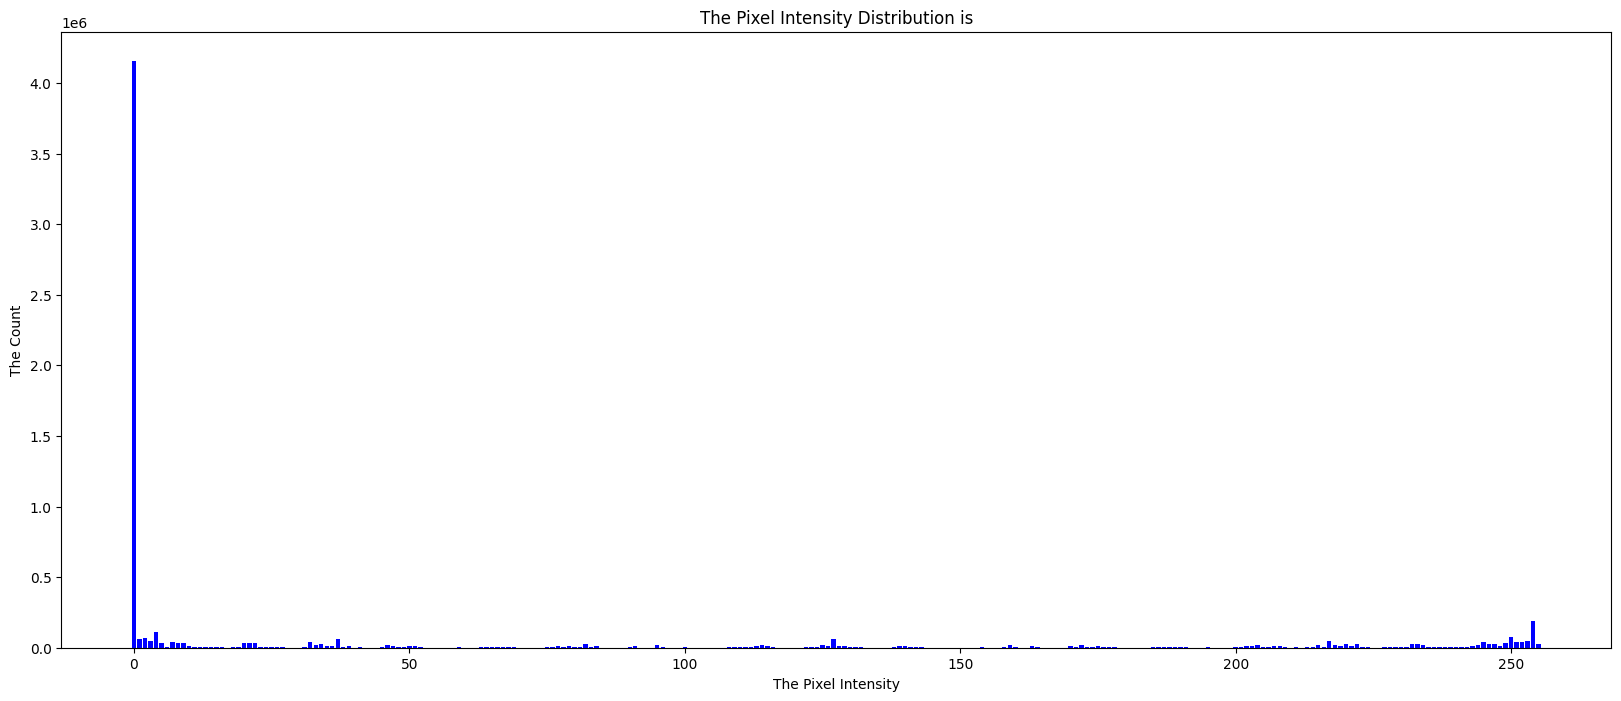

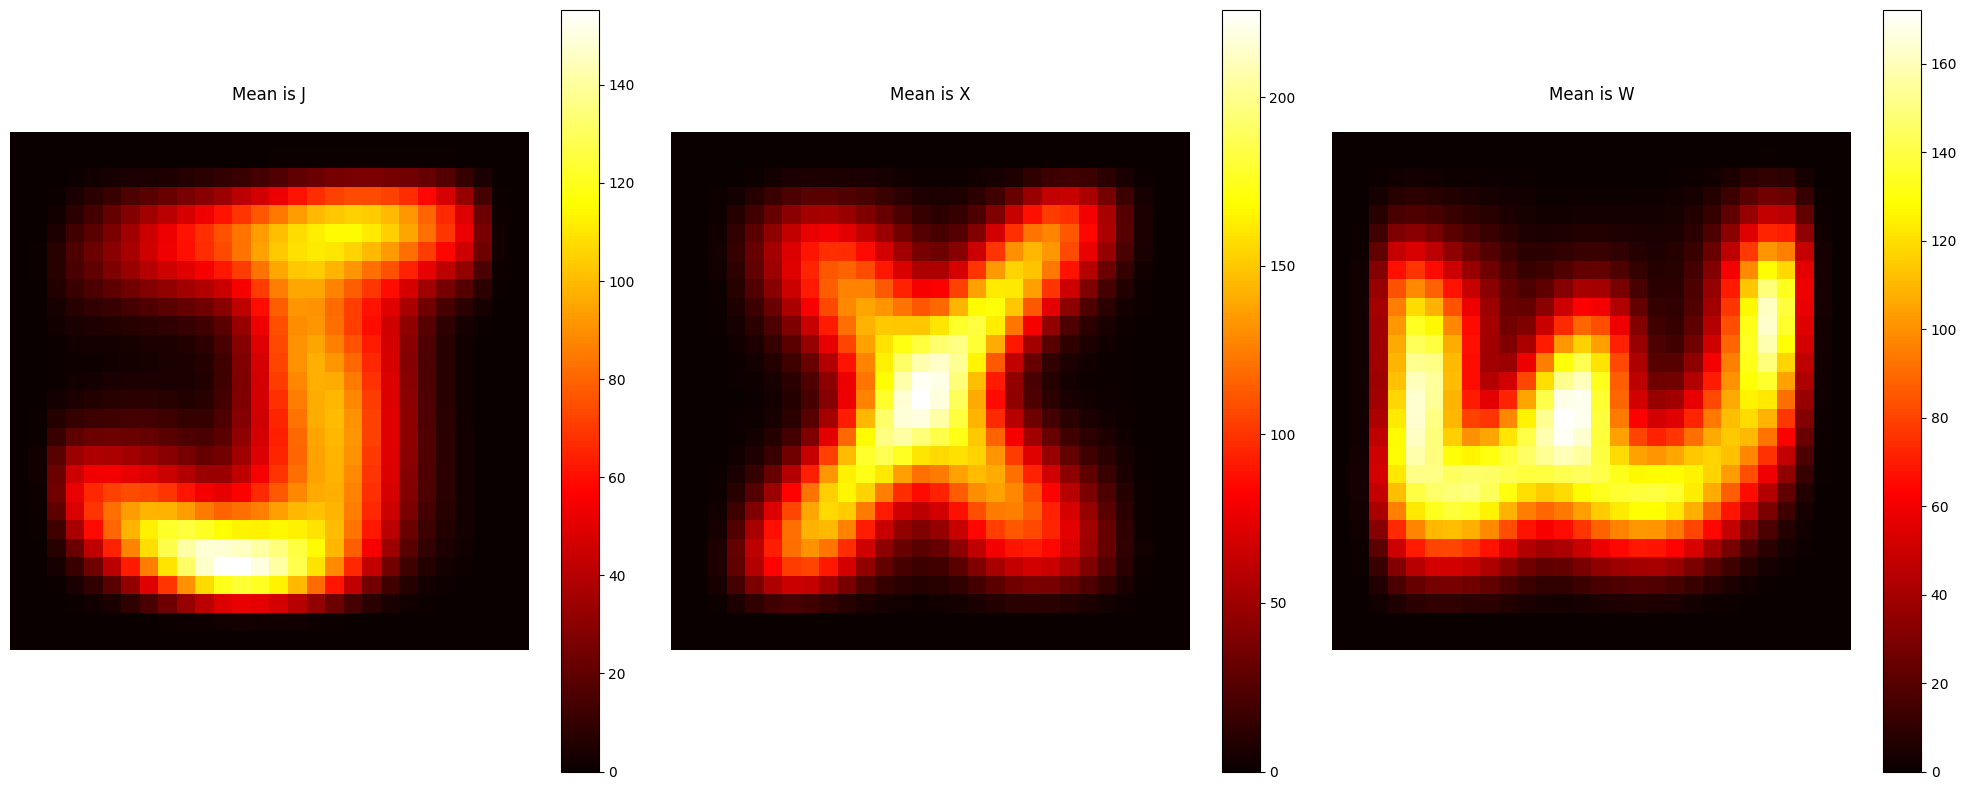

In [36]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import os

# Viz 1: number of images per category in a bar chart.
def plot_cat_dist(cats):
    # I'm counting the number of images in each category.
    cat_counts=[len(os.listdir(os.path.join(sd_path,c))) for c in cats]
    plt.figure(figsize=(20,8))
    plt.bar(cats,cat_counts,color='red')
    plt.xlabel('Categories')
    plt.ylabel('Images Counts')
    plt.xticks(rotation=90)
    plt.title('These are the images per category')
    plt.show()

# the category distribution.
plot_cat_dist(sd_contents)

# Viz 2: the pixel intensity distribution.
def plot_pix_dist(cats):
    pix_counts=np.zeros(256,dtype=int)
    for c in cats:
        c_path=os.path.join(sd_path,c)
        imgs=os.listdir(c_path)
        for img in imgs:
            img_path=os.path.join(c_path,img)
            image=Image.open(img_path)
            pix=np.array(image).flatten()
            for p in pix:
                pix_counts[p]+=1
    plt.figure(figsize=(20,8))
    plt.bar(range(256),pix_counts,color='blue')
    plt.xlabel('The Pixel Intensity')
    plt.ylabel('The Count')
    plt.title('The Pixel Intensity Distribution is')
    plt.show()

# Checking the pixel distribution for a subset of categories.
plot_pix_dist(random.sample(sd_contents,3))

# Viz 3: heatmaps of the mean image for each category.
def plot_heatmaps(cats,img_size=(28,28)):
    fig,axs=plt.subplots(1,len(cats),figsize=(20,8))
    for i, c in enumerate(cats):
        c_path=os.path.join(sd_path,c)
        imgs=os.listdir(c_path)
        mean_img=np.zeros(img_size,dtype=np.float32)
        for img in imgs:
            img_path=os.path.join(c_path, img)
            image=Image.open(img_path)
            mean_img+=np.array(image)
        mean_img/=len(imgs)
        ax=axs[i]
        cax=ax.matshow(mean_img,cmap='hot')
        fig.colorbar(cax,ax=ax)
        ax.set_title('Mean is '+c)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizing the average image for a few categories.
plot_heatmaps(random.sample(sd_contents,3))

In [10]:
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms

# Setting up constants.
IMG_SZ=64  # Setting the image size constant to 64x64.
CLS_NUM=36  # Total classes (0-9, A-Z).
VAL_FRAC=0.1  # Fraction for validation.
TEST_FRAC=0.1  # Fraction for testing.
BATCH_SZ=128  # Batch size for data loading.

# Defining the transformation pipeline for the images.
trsfm=transforms.Compose([
    transforms.Grayscale(),  # I'm making sure the images are in grayscale.
    transforms.Resize((IMG_SZ,IMG_SZ)),  # Resizing the images to 64x64.
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))  # Normalizing the images.
])

# Creating a custom dataset class.
class CustomDS(Dataset):
    def __init__(self,r_dir,trsfm=None):
        self.r_dir=r_dir
        self.trsfm=trsfm
        self.imgs=[]  # List for image file paths.
        self.lbls=[]  # List for labels.

        # I'll collect all image paths and their labels.
        for l, cat in enumerate(sorted(os.listdir(r_dir))):
            c_path=os.path.join(r_dir,cat)
            for f in os.listdir(c_path):
                f_path=os.path.join(c_path,f)
                self.imgs.append(f_path)
                self.lbls.append(l)

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_p=self.imgs[idx]
        img=Image.open(img_p)
        lbl=self.lbls[idx]
        if self.trsfm:
            img=self.trsfm(img)
        return img,lbl

# Setting up our dataset and split it.
ds=CustomDS(sd_path,trsfm=trsfm)
total=len(ds)
val_size=int(VAL_FRAC * total)
test_size=int(TEST_FRAC * total)
train_size=total - val_size - test_size

# Splitting the dataset.
train_ds,val_ds,test_ds=random_split(ds,[train_size,val_size,test_size])

# Setting up DataLoaders for each set.
train_ldr=DataLoader(train_ds,batch_size=BATCH_SZ,shuffle=True)
val_ldr=DataLoader(val_ds,batch_size=BATCH_SZ)
test_ldr=DataLoader(test_ds,batch_size=BATCH_SZ)

# I'll check the sizes of each dataset part.
len(train_ds),len(val_ds),len(test_ds)

(80640, 10080, 10080)

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Setting up the device I'll use - I'll use a GPU if available.
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Defining my CNN class, inheriting from nn.Module.
class MyCNN(nn.Module):
    def __init__(self, n_cls=36):
        super(MyCNN, self).__init__()
        # I'm defining the convolutional layers with batch normalization.
        self.c1=nn.Conv2d(1,32,3,1,1)
        self.b1=nn.BatchNorm2d(32)
        self.c2=nn.Conv2d(32,64,3,1,1)
        self.b2=nn.BatchNorm2d(64)
        self.c3=nn.Conv2d(64,128,3,1,1)
        self.b3=nn.BatchNorm2d(128)

        # Max pooling will reduce the image size by half each time.
        self.pool=nn.MaxPool2d(2,2)

        # Fully connected layers, going down to the number of classes.
        self.fc1=nn.Linear(128*8*8,256)  # Adjusting for 64x64 images, after pooling
        self.b4=nn.BatchNorm1d(256)
        self.fc2=nn.Linear(256,n_cls)
        # A dropout layer to avoid overfitting.
        self.drop=nn.Dropout(0.5)

    def forward(self, x):
        # Here's the forward pass through the network.
        x=self.pool(F.relu(self.b1(self.c1(x))))
        x=self.pool(F.relu(self.b2(self.c2(x))))
        x=self.pool(F.relu(self.b3(self.c3(x))))

        # Flatten before passing through the fully connected layers.
        x=x.view(-1, 128 * 8 * 8)
        x=self.drop(F.relu(self.b4(self.fc1(x))))
        x=self.fc2(x)
        return x

# Now I'll instantiate my CNN model.
m=MyCNN(n_cls=36).to(device)  # Moving it to the device (GPU or CPU).

# Checking where the model is running.
print(f'Model will run on: {device}')


Model will run on: cuda


In [50]:
print(m)

MyCNN(
  (c1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (c3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (b4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=36, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [45]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

# I'm setting the learning rate, the number of epochs, and the patience for early stopping.
lr=0.001
epochs=15
stop_patience=3

# Here, I'm defining the loss function, optimizer, and learning rate scheduler for my model 'm'.
crit=nn.CrossEntropyLoss()
opt=optim.Adam(m.parameters(),lr=lr)
sched=lr_scheduler.StepLR(opt,step_size=5,gamma=0.1)

# I'm creating lists to keep track of losses and accuracies during training, validation, and testing.
tr_losses,vl_losses,tr_accs,vl_accs,ts_losses,ts_accs=[],[],[],[],[],[]

# Preparing for early stopping, I set an infinite loss as a high starting point and a counter for patience.
best_vl_loss=float('inf')
patience=0

# Noting the start time to calculate total training time later.
start=time.time()

# Now, I start the training loop over the specified number of epochs.
for ep in range(epochs):
    m.train()  # I make sure the model is in training mode.
    tr_loss,correct_tr,total_tr=0.0,0,0

    # For each batch in the training loader, I perform a forward pass, calculate loss, backpropagate, and update weights.
    for imgs,lbls in train_ldr:
        imgs,lbls=imgs.to(device),lbls.to(device)
        opt.zero_grad()
        out=m(imgs)
        loss=crit(out, lbls)
        loss.backward()
        opt.step()

        tr_loss+=loss.item()
        _, pred=out.max(1)
        correct_tr+=pred.eq(lbls).sum().item()
        total_tr+=lbls.size(0)

    # After each epoch, I store the training loss and accuracy.
    tr_losses.append(tr_loss/len(train_ldr))
    tr_accs.append(100*correct_tr/total_tr)

    # I switch the model to evaluation mode for validation.
    m.eval()
    vl_loss,correct_vl,total_vl=0.0, 0, 0
    with torch.no_grad():
        # I do the same for the validation set - forward pass and calculate loss.
        for imgs,lbls in val_ldr:
            imgs,lbls=imgs.to(device),lbls.to(device)
            out=m(imgs)
            loss=crit(out,lbls)
            vl_loss+=loss.item()
            _, pred=out.max(1)
            correct_vl+=pred.eq(lbls).sum().item()
            total_vl+=lbls.size(0)

    # I keep track of the validation loss and accuracy as well.
    vl_losses.append(vl_loss/len(val_ldr))
    vl_accs.append(100*correct_vl/total_vl)
    sched.step()  # I adjust the learning rate based on the scheduler.

    # Here, I test the model the same way I validated it, keeping track of loss and accuracy.
    ts_loss,correct_ts,total_ts=0.0,0,0
    with torch.no_grad():
        for imgs,lbls in test_ldr:
            imgs,lbls=imgs.to(device),lbls.to(device)
            out=m(imgs)
            loss=crit(out,lbls)
            ts_loss+=loss.item()
            _, pred=out.max(1)
            correct_ts+=pred.eq(lbls).sum().item()
            total_ts+=lbls.size(0)

    # The test losses and accuracies are stored after each epoch.
    ts_losses.append(ts_loss/len(test_ldr))
    ts_accs.append(100*correct_ts/total_ts)

    # If my validation loss improves, I save the model. If not, I count this against my patience for early stopping.
    if vl_losses[-1]<best_vl_loss:
        best_vl_loss=vl_losses[-1]
        patience=0
        best_m_wts=m.state_dict()  # I save the best model weights so far.
    else:
        patience+=1
        if patience>=stop_patience:
            print("The Early stopping is being triggered.")
            m.load_state_dict(best_m_wts)  # If patience runs out, I revert to the best model state.
            break

    # I print out the losses and accuracies for insight into the training progress.
    print('Epoch is {}/{}, Train Loss is {:.4f}, Train Acc is {:.2f}%, Val Loss is {:.4f}, Val Acc is {:.2f}%, Test Loss is {:.4f}, Test Acc is {:.2f}%'.format(
    ep+1,epochs,tr_losses[-1],tr_accs[-1],vl_losses[-1],vl_accs[-1],ts_losses[-1],ts_accs[-1]
))


# When the training is done, I print out the total time it took.
end = time.time()
print('Total training time is {:.2f} seconds'.format(end - start))

Epoch is 1/15, Train Loss is 0.5375, Train Acc is 84.43%, Val Loss is 0.2833, Val Acc is 89.74%, Test Loss is 0.2761, Test Acc is 90.33%
Epoch is 2/15, Train Loss is 0.2976, Train Acc is 89.28%, Val Loss is 0.2467, Val Acc is 90.74%, Test Loss is 0.2431, Test Acc is 90.89%
Epoch is 3/15, Train Loss is 0.2596, Train Acc is 90.39%, Val Loss is 0.2325, Val Acc is 91.44%, Test Loss is 0.2304, Test Acc is 91.27%
Epoch is 4/15, Train Loss is 0.2333, Train Acc is 91.19%, Val Loss is 0.2273, Val Acc is 91.35%, Test Loss is 0.2312, Test Acc is 91.03%
Epoch is 5/15, Train Loss is 0.2142, Train Acc is 91.78%, Val Loss is 0.2310, Val Acc is 91.28%, Test Loss is 0.2283, Test Acc is 91.44%
Epoch is 6/15, Train Loss is 0.1783, Train Acc is 92.91%, Val Loss is 0.2070, Val Acc is 92.27%, Test Loss is 0.2056, Test Acc is 92.35%
Epoch is 7/15, Train Loss is 0.1650, Train Acc is 93.46%, Val Loss is 0.2056, Val Acc is 92.33%, Test Loss is 0.2040, Test Acc is 92.37%
Epoch is 8/15, Train Loss is 0.1585, Trai

In [52]:
from google.colab import files
torch.save(best_m_wts, '/content/kritikku_assignment2_part3.pth')

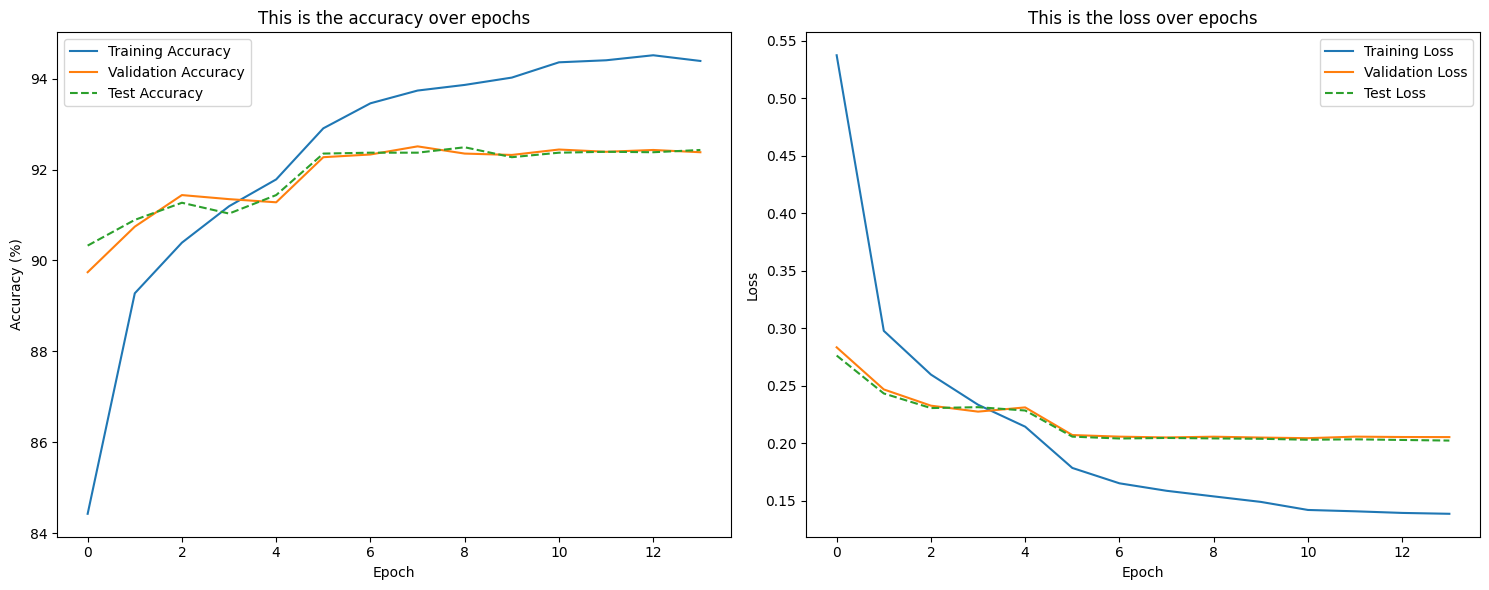

In [46]:
plt.figure(figsize=(15,6))
# I plot the training, validation, and test accuracies.
plt.subplot(1,2,1)
plt.plot(tr_accs,label='Training Accuracy')
plt.plot(vl_accs,label='Validation Accuracy')
plt.plot(ts_accs,label='Test Accuracy',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('This is the accuracy over epochs')
plt.legend()

# I also plot the training, validation, and test losses.
plt.subplot(1,2,2)
plt.plot(tr_losses,label='Training Loss')
plt.plot(vl_losses,label='Validation Loss')
plt.plot(ts_losses,label='Test Loss',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('This is the loss over epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
import torch
from sklearn.metrics import precision_recall_fscore_support

# I'll get the predictions and true labels for the test set.
preds,true_lbls=[],[]

# No gradient is needed for this validation-like step.
with torch.no_grad():
    for imgs,lbls in test_ldr:  # Looping through the test DataLoader.
        imgs=imgs.to(device)  # I'm sending the images to the same device as the model.

        outs=m(imgs)  # Getting the output from the model.
        _,pred=outs.max(1)  # I'm interested in the index of the max logit which represents the predicted class.

        # If the predictions are on a GPU, I need to move them back to CPU to work with sklearn.
        if device.type=='cuda':
            pred=pred.cpu()
            lbls=lbls.cpu()

        # I'm extending my predictions and true labels lists.
        preds.extend(pred.tolist())
        true_lbls.extend(lbls.tolist())

# Now I calculate precision, recall, and F1 score using weighted average as I want to account for label imbalance.
prec,rec,f1,_=precision_recall_fscore_support(true_lbls,preds,average='weighted')

# Let's print out the precision, recall, and F1 score to see how well the model performs.
print('The precision is {:.4f}, the recall is {:.4f}, the F1 Score is {:.4f}'.format(prec,rec,f1))

The precision is 0.9258, the recall is 0.9243, the F1 Score is 0.9242


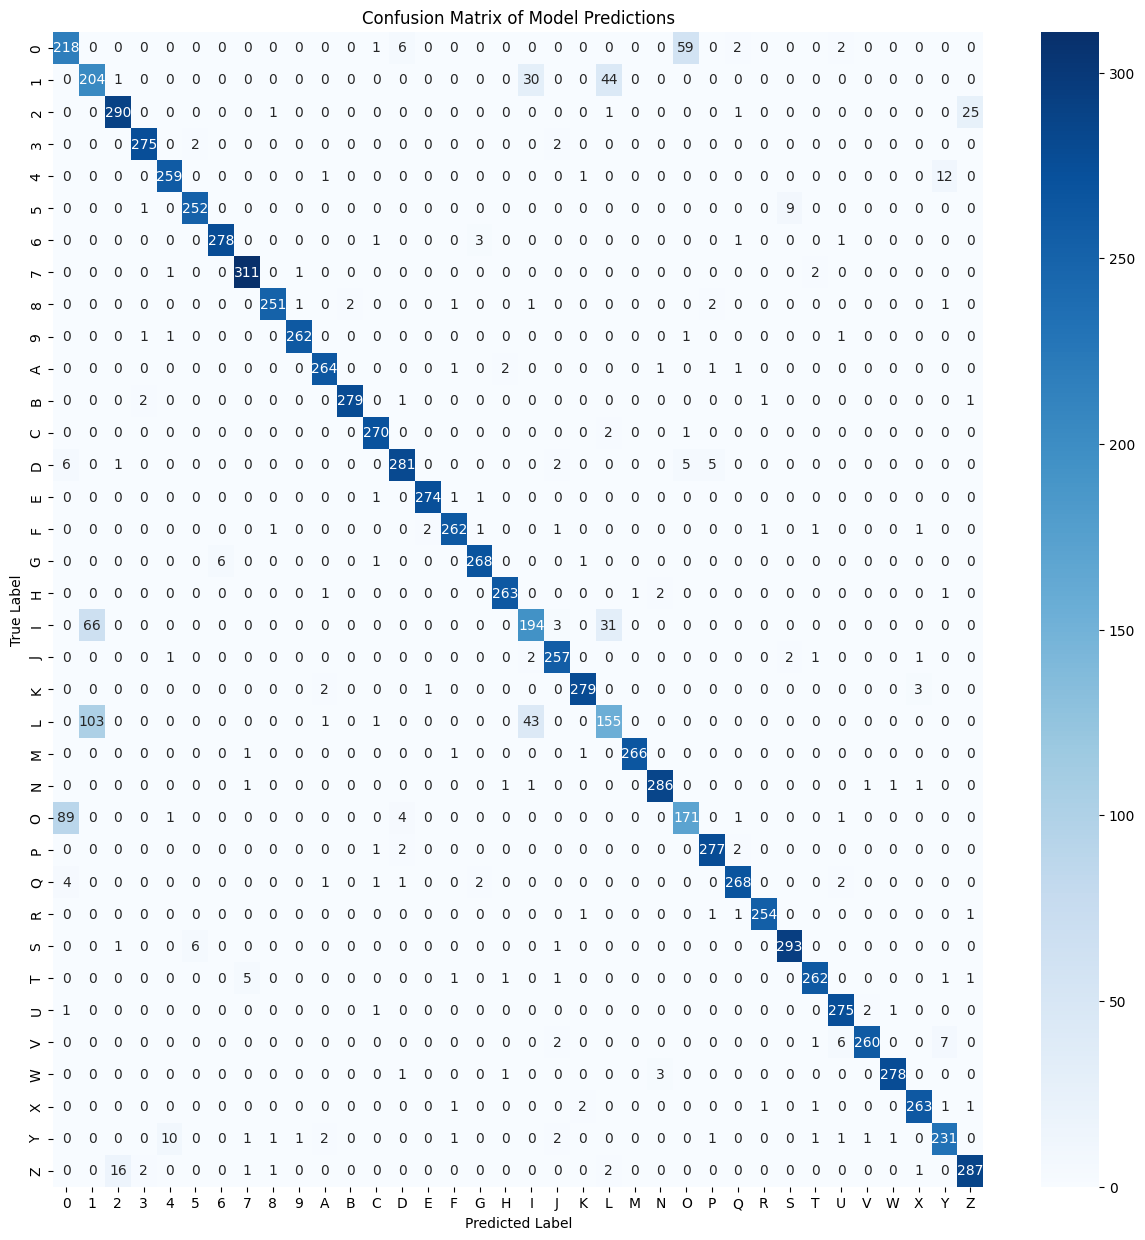

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Now, I'm going to calculate the confusion matrix using the labels and predictions I've gathered.
conf_mat = confusion_matrix(true_lbls, preds)

# I'm interested in visualizing this matrix to see where my model's predictions are going wrong.
plt.figure(figsize=(15, 15))
# I'm using seaborn's heatmap function for this because it makes the visualization much clearer and more informative.
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(sd_contents), yticklabels=sorted(sd_contents))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model Predictions')
plt.show()

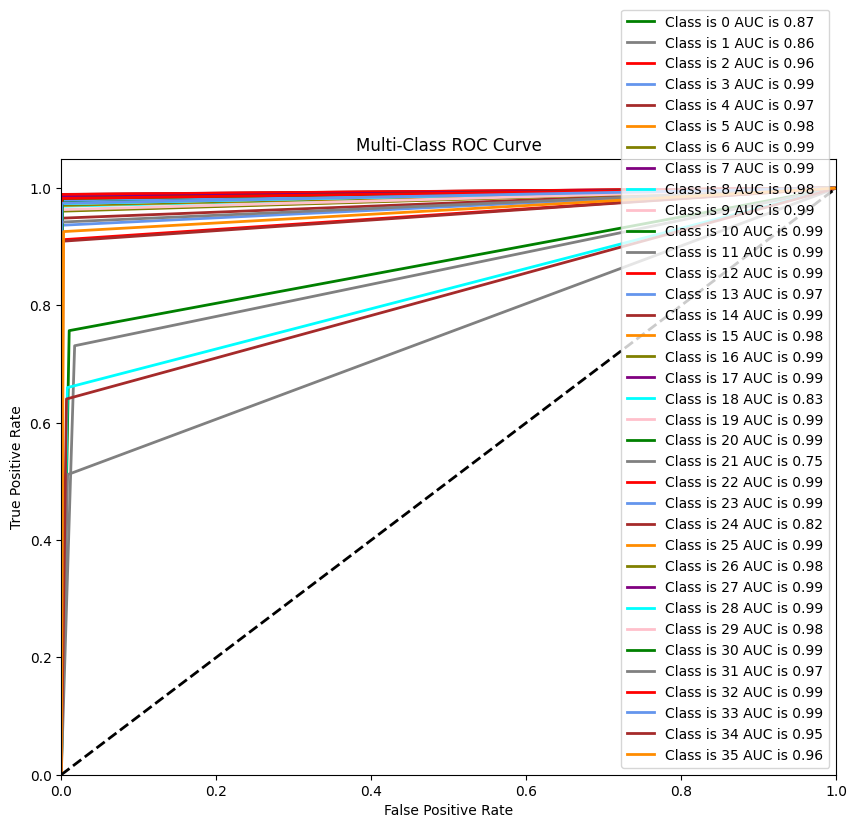

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Now I'm going to analyze the performance of my model using ROC curves for each class.
# First, I'll binarize the labels since we're dealing with multiple classes.
y_true_bin=label_binarize(true_lbls,classes=list(range(36)))
y_pred_bin=label_binarize(preds,classes=list(range(36)))

# Preparing dictionaries to hold the false positive rates, true positive rates, and areas under the ROC curves.
fpr,tpr,roc_auc={},{},{}

# Calculating these metrics for each class.
for i in range(36):
    fpr[i],tpr[i],_=roc_curve(y_true_bin[:,i],y_pred_bin[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

# I want to see the ROC curves for all classes, so I'll plot them.
plt.figure(figsize=(10,8))
# Choosing a different color for each class.
cls_colors=cycle(['green','gray','red','cornflowerblue','brown','darkorange','olive','purple','aqua','pink'])

for i,color in zip(range(36),cls_colors):
    plt.plot(fpr[i],tpr[i],color=color,lw=2,label='Class is {} AUC is {:.2f}'.format(i,roc_auc[i]))

# Adding the random chance line.
plt.plot([0, 1],[0, 1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


Part 4

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# I'm defining my neural network class, which will be a version of VGG11.
class MyVGG11(nn.Module):
    def __init__(self, n_classes=36):
        super(MyVGG11, self).__init__()

        # I'm setting up the convolutional layers in a sequence here.
        self.feats = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3, padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )

        # And here are the fully connected layers.
        self.clsfr = nn.Sequential(
            nn.Linear(512 * 2 * 2, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, n_classes)
        )

    def forward(self, x):
        # The forward pass through the network.
        x = self.feats(x)
        x = x.view(x.size(0), -1)  # Flattening the features from the conv layers.
        x = self.clsfr(x)
        if not self.training:
            x = F.softmax(x, dim=1)  # Softmax is used during inference.
        return x

# Now I'm instantiating my neural network.
my_vgg11 = MyVGG11()

# I'm setting up the device I'll use for training. I'll use GPU if it's available.
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
my_vgg11 = my_vgg11.to(dev)  # Moving my model to the appropriate device.

# Printing out which device the model will run on.
print('Model will run on:', dev)

# If I want to inspect the model's structure, I can print it.
print(my_vgg11)


Model will run on: cuda
MyVGG11(
  (feats): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [39]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

# Setting the learning rate, the number of epochs, and the patience for early stopping.
lr=0.001
epochs=15
stop_patience=3

# Defining the loss function, optimizer, and learning rate scheduler for my model 'my_vgg11'.
crit=nn.CrossEntropyLoss()
opt=optim.Adam(my_vgg11.parameters(), lr=lr)
sched=lr_scheduler.StepLR(opt,step_size=5,gamma=0.1)

# Creating lists to track losses and accuracies during training, validation, and testing.
tr_losses,vl_losses,tr_accs,vl_accs,ts_losses,ts_accs=[],[],[],[],[],[]

# Preparing for early stopping with a high initial loss and setting a patience counter.
best_vl_loss=float('inf')
patience=0

# Noting the start time to track the total training duration.
start=time.time()

# Starting the training loop over the specified number of epochs.
for ep in range(epochs):
    my_vgg11.train()  # Making sure the model is in training mode.
    tr_loss,correct_tr,total_tr=0.0,0,0

    # Performing a forward pass, backpropagation, and weight update for each training batch.
    for imgs,lbls in train_ldr:
        imgs,lbls=imgs.to(device),lbls.to(device)
        opt.zero_grad()
        out=my_vgg11(imgs)
        loss=crit(out,lbls)
        loss.backward()
        opt.step()

        tr_loss+=loss.item()
        _, pred=out.max(1)
        correct_tr+=pred.eq(lbls).sum().item()
        total_tr+=lbls.size(0)

    # Storing the training loss and accuracy after each epoch.
    tr_losses.append(tr_loss/len(train_ldr))
    tr_accs.append(100*correct_tr/total_tr)

    # Switching to evaluation mode for validation.
    my_vgg11.eval()
    vl_loss,correct_vl,total_vl=0.0,0,0
    with torch.no_grad():
        # Calculating the validation loss.
        for imgs,lbls in val_ldr:
            imgs,lbls=imgs.to(device),lbls.to(device)
            out=my_vgg11(imgs)
            loss=crit(out,lbls)
            vl_loss+=loss.item()
            _,pred=out.max(1)
            correct_vl+=pred.eq(lbls).sum().item()
            total_vl+=lbls.size(0)

    # Tracking the validation loss and accuracy.
    vl_losses.append(vl_loss/len(val_ldr))
    vl_accs.append(100*correct_vl/total_vl)
    sched.step()  # Adjusting the learning rate based on the scheduler.

    # Testing the model and tracking loss and accuracy.
    ts_loss,correct_ts,total_ts=0.0,0,0
    with torch.no_grad():
        for imgs,lbls in test_ldr:
            imgs,lbls=imgs.to(device),lbls.to(device)
            out=my_vgg11(imgs)
            loss=crit(out,lbls)
            ts_loss+=loss.item()
            _,pred=out.max(1)
            correct_ts+=pred.eq(lbls).sum().item()
            total_ts+=lbls.size(0)

    # Storing the test losses and accuracies.
    ts_losses.append(ts_loss/len(test_ldr))
    ts_accs.append(100*correct_ts/total_ts)

    # Saving the model if the validation loss improves.
    if vl_losses[-1] < best_vl_loss:
        best_vl_loss=vl_losses[-1]
        patience=0
        best_weights=my_vgg11.state_dict()  # Saving the best model weights.
    else:
        patience+=1
        if patience >= stop_patience:
            print("The Early stopping is triggered.")
            my_vgg11.load_state_dict(best_weights)  # Reverting to the best model state if patience is exceeded.
            break

    # Printing the progress after each epoch.
    print('Epoch {}/{} completed, Train Loss: {:.4f}, Train Acc: {:.2f}%, Val Loss: {:.4f}, Val Acc: {:.2f}%, Test Loss: {:.4f}, Test Acc: {:.2f}%'.format(
    ep+1,epochs,tr_losses[-1],tr_accs[-1],vl_losses[-1],vl_accs[-1],ts_losses[-1],ts_accs[-1]
))

# Calculating the total training time.
end=time.time()
print('Total training time is {:.2f} seconds'.format(end - start))

Epoch 1/15 completed, Train Loss: 1.8281, Train Acc: 45.61%, Val Loss: 2.8174, Val Acc: 85.50%, Test Loss: 2.8242, Test Acc: 85.22%
Epoch 2/15 completed, Train Loss: 0.3526, Train Acc: 87.32%, Val Loss: 2.7670, Val Acc: 89.67%, Test Loss: 2.7702, Test Acc: 89.37%
Epoch 3/15 completed, Train Loss: 0.2769, Train Acc: 89.93%, Val Loss: 2.7574, Val Acc: 90.03%, Test Loss: 2.7593, Test Acc: 90.19%
Epoch 4/15 completed, Train Loss: 0.2507, Train Acc: 90.67%, Val Loss: 2.7467, Val Acc: 90.93%, Test Loss: 2.7479, Test Acc: 90.86%
Epoch 5/15 completed, Train Loss: 0.2323, Train Acc: 91.28%, Val Loss: 2.7476, Val Acc: 90.99%, Test Loss: 2.7489, Test Acc: 91.09%
Epoch 6/15 completed, Train Loss: 0.1703, Train Acc: 93.03%, Val Loss: 2.7298, Val Acc: 91.86%, Test Loss: 2.7324, Test Acc: 91.60%
Epoch 7/15 completed, Train Loss: 0.1536, Train Acc: 93.66%, Val Loss: 2.7293, Val Acc: 92.07%, Test Loss: 2.7315, Test Acc: 91.75%
Epoch 8/15 completed, Train Loss: 0.1435, Train Acc: 93.98%, Val Loss: 2.725

In [53]:
from google.colab import files
torch.save(best_weights, '/content/kritikku_assignment2_part4.pth')

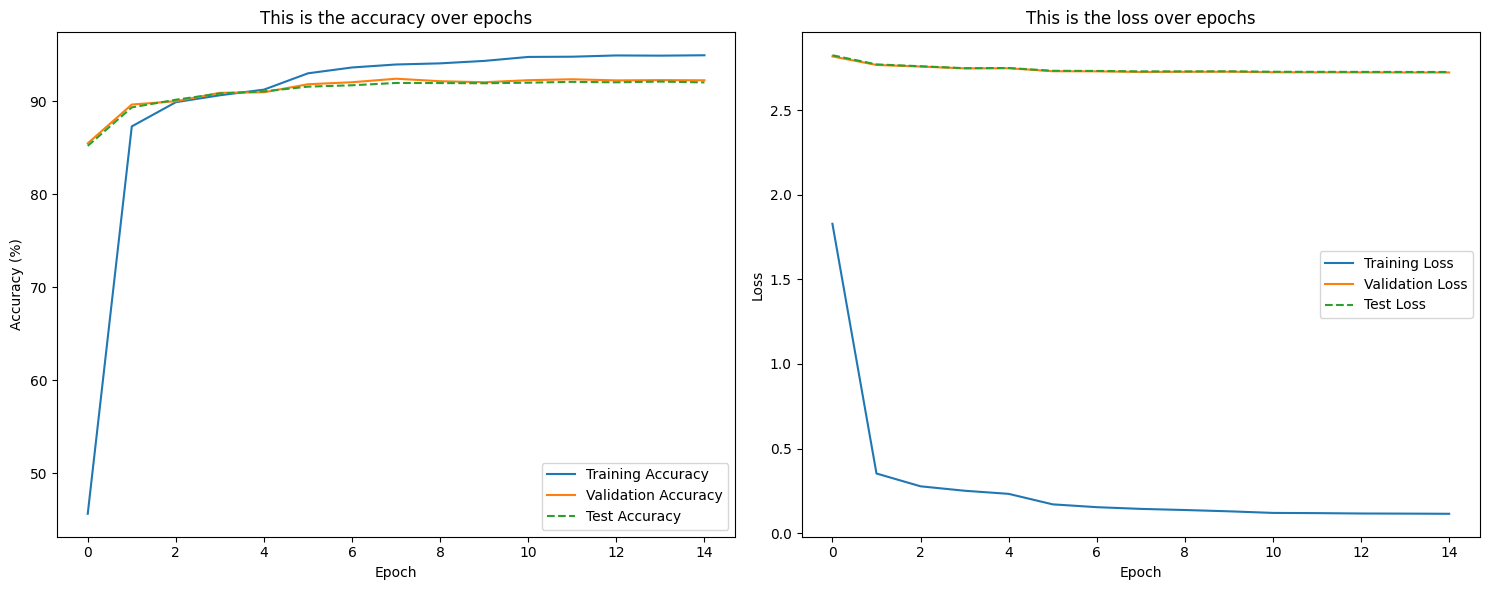

In [40]:
plt.figure(figsize=(15,6))
# I plot the training, validation, and test accuracies.
plt.subplot(1,2,1)
plt.plot(tr_accs,label='Training Accuracy')
plt.plot(vl_accs,label='Validation Accuracy')
plt.plot(ts_accs,label='Test Accuracy',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('This is the accuracy over epochs')
plt.legend()

# I also plot the training, validation, and test losses.
plt.subplot(1,2,2)
plt.plot(tr_losses,label='Training Loss')
plt.plot(vl_losses,label='Validation Loss')
plt.plot(ts_losses,label='Test Loss',linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('This is the loss over epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
import torch
from sklearn.metrics import precision_recall_fscore_support

# I'll get the predictions and true labels for the test set.
preds,true_lbls=[],[]

# No gradient is needed for this validation-like step.
with torch.no_grad():
    for imgs,lbls in test_ldr:  # Looping through the test DataLoader.
        imgs=imgs.to(device)  # I'm sending the images to the same device as the model.

        outs=m(imgs)  # Getting the output from the model.
        _,pred=outs.max(1)  # I'm interested in the index of the max logit which represents the predicted class.

        # If the predictions are on a GPU, I need to move them back to CPU to work with sklearn.
        if device.type=='cuda':
            pred=pred.cpu()
            lbls=lbls.cpu()

        # I'm extending my predictions and true labels lists.
        preds.extend(pred.tolist())
        true_lbls.extend(lbls.tolist())

# Now I calculate precision, recall, and F1 score using weighted average as I want to account for label imbalance.
prec,rec,f1,_=precision_recall_fscore_support(true_lbls,preds,average='weighted')

# Let's print out the precision, recall, and F1 score to see how well the model performs.
print('The precision is {:.4f}, the recall is {:.4f}, the F1 Score is {:.4f}'.format(prec,rec,f1))

The precision is 0.9183, the recall is 0.9173, the F1 Score is 0.9173


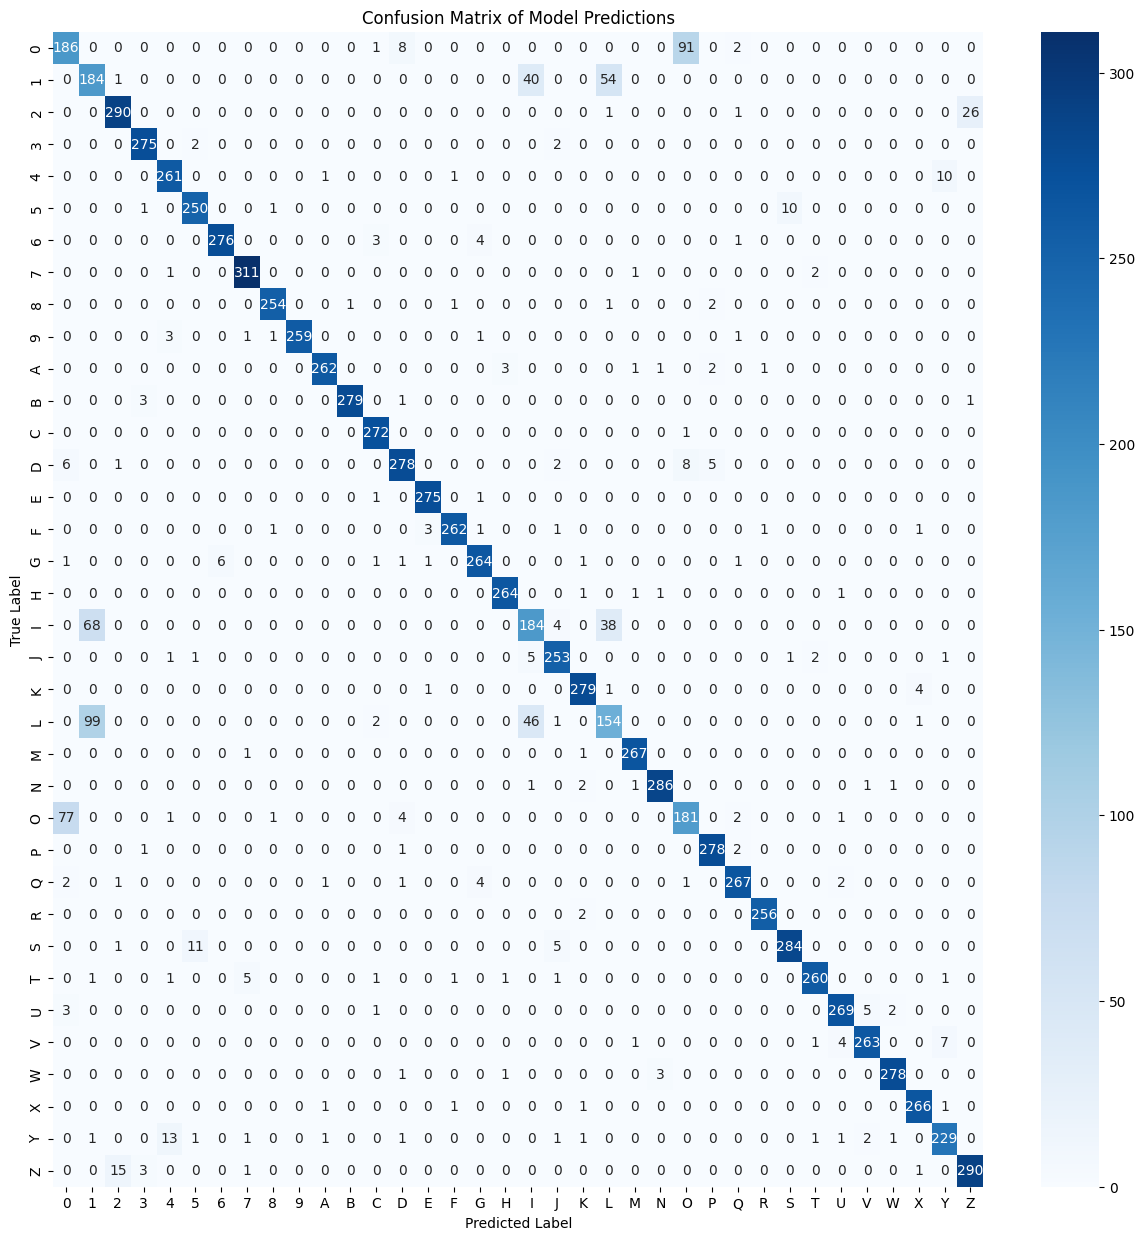

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Now, I'm going to calculate the confusion matrix using the labels and predictions I've gathered.
conf_mat = confusion_matrix(true_lbls, preds)

# I'm interested in visualizing this matrix to see where my model's predictions are going wrong.
plt.figure(figsize=(15, 15))
# I'm using seaborn's heatmap function for this because it makes the visualization much clearer and more informative.
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(sd_contents), yticklabels=sorted(sd_contents))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Model Predictions')
plt.show()


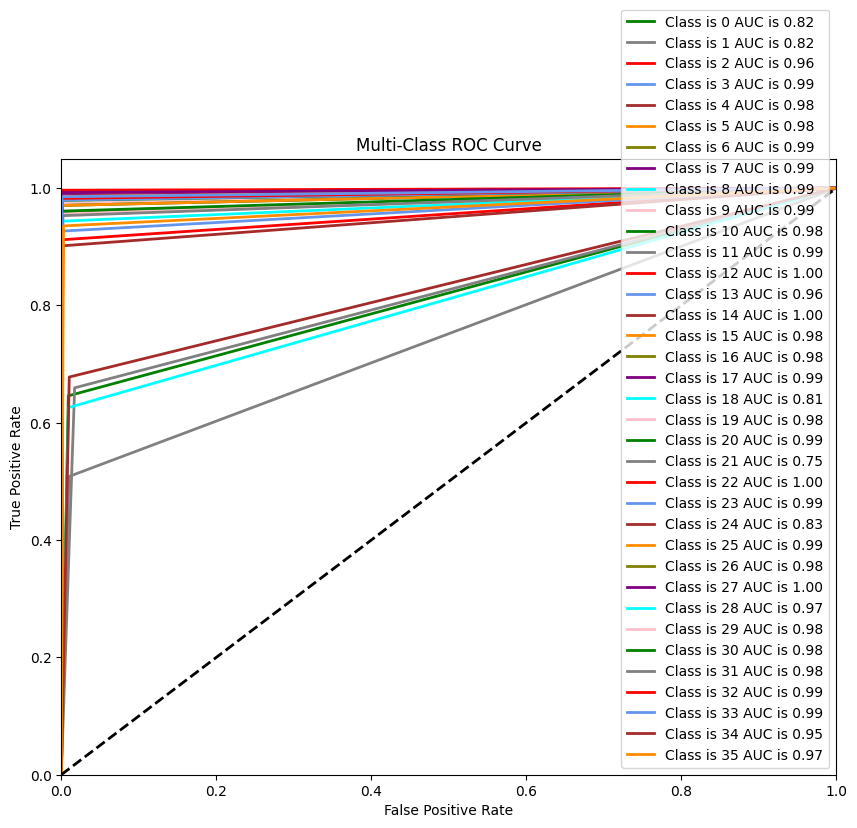

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Now I'm going to analyze the performance of my model using ROC curves for each class.
# First, I'll binarize the labels since we're dealing with multiple classes.
y_true_bin=label_binarize(true_lbls,classes=list(range(36)))
y_pred_bin=label_binarize(preds,classes=list(range(36)))

# Preparing dictionaries to hold the false positive rates, true positive rates, and areas under the ROC curves.
fpr,tpr,roc_auc={},{},{}

# Calculating these metrics for each class.
for i in range(36):
    fpr[i],tpr[i],_=roc_curve(y_true_bin[:,i],y_pred_bin[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

# I want to see the ROC curves for all classes, so I'll plot them.
plt.figure(figsize=(10,8))
# Choosing a different color for each class.
cls_colors=cycle(['green','gray','red','cornflowerblue','brown','darkorange','olive','purple','aqua','pink'])

for i,color in zip(range(36),cls_colors):
    plt.plot(fpr[i],tpr[i],color=color,lw=2,label='Class is {} AUC is {:.2f}'.format(i,roc_auc[i]))

# Adding the random chance line.
plt.plot([0, 1],[0, 1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()
